In [5]:
import os
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import copy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy import stats

os.chdir("C:/Users/user/marketing")

In [2]:
data = pd.read_excel("marketing.xlsx")
data_org = pd.read_excel("marketing.xlsx")

In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,80,30,61,2,6,5,10,3,0,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# 전처리

- str -> 수치형  (Education, Marital_Status, Dt_Customer)     



1. One-hot encoding을 사용해 Education, Marital_Status 변수 전처리
2. Dt_Customer을 날짜형 변수로 불러와 년도, 월, 일, 요일변수로 분리
3. 결측값 mean으로 fill

In [7]:
one_hot_list = ["Education","Marital_Status"]
for col in one_hot_list:
    one_hot = pd.get_dummies(data[col], prefix = col)
    data = data.drop([col],axis=1)
    data = pd.concat([data, one_hot], axis= 1)

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'],format='%Y-%m-%d')

In [9]:
data['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [10]:
data['Wday'] = data['Dt_Customer'].dt.day_name()
data['yyyy'] = data['Dt_Customer'].dt.strftime('%Y')
data['mm'] = data['Dt_Customer'].dt.strftime('%m')
data['dd'] = data['Dt_Customer'].dt.strftime('%d')

In [11]:
data['yyyy'] = data['yyyy'].astype(int)
data['mm'] = data['mm'].astype(int)
data['dd'] = data['dd'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Income                   2216 non-null   float64       
 3   Kidhome                  2240 non-null   int64         
 4   Teenhome                 2240 non-null   int64         
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   int64         
 7   MntWines                 2240 non-null   int64         
 8   MntFruits                2240 non-null   int64         
 9   MntMeatProducts          2240 non-null   int64         
 10  MntFishProducts          2240 non-null   int64         
 11  MntSweetProducts         2240 non-null   int64         
 12  MntGoldProds             2240 non-

In [13]:
data['yyyy'].value_counts()

2013    1189
2014     557
2012     494
Name: yyyy, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['Wday'])
labels = encoder.transform(data['Wday'])
data['Wday'] = labels

In [15]:
# 변수명 변경(띄어쓰기 없애기)
data['Education_2n_Cycle'] = data['Education_2n Cycle']
data['Education_2n_Cycle']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: Education_2n_Cycle, Length: 2240, dtype: uint8

In [16]:
data = data.fillna(data.mean())

# Q1

In [17]:
data_q1 = data[["MntWines","MntMeatProducts","MntFishProducts","MntFruits","MntGoldProds","MntSweetProducts"]]

In [18]:
data_q1

,MntWines,MntMeatProducts,MntFishProducts,MntFruits,MntGoldProds,MntSweetProducts
0,635,546,172,88,88,88
1,11,6,2,1,6,1
2,426,127,111,49,42,21
3,11,20,10,4,5,3
4,173,118,46,43,15,27
...,...,...,...,...,...,...
2235,709,182,42,43,247,118
2236,406,30,0,0,8,0
2237,908,217,32,48,24,12
2238,428,214,80,30,61,30


#### 결과 

1. 모든 변수들의 분포는 right skew한걸 막대그래프를 통해 확인이 가능하다
2. 각 변수들과 MntWines 변수간의 상관관계는 존재하지 않는다.


-MntWines, MntMeatProducts, MntFishProducts, MntFruits, MntGoldProds, MntSweetProducts

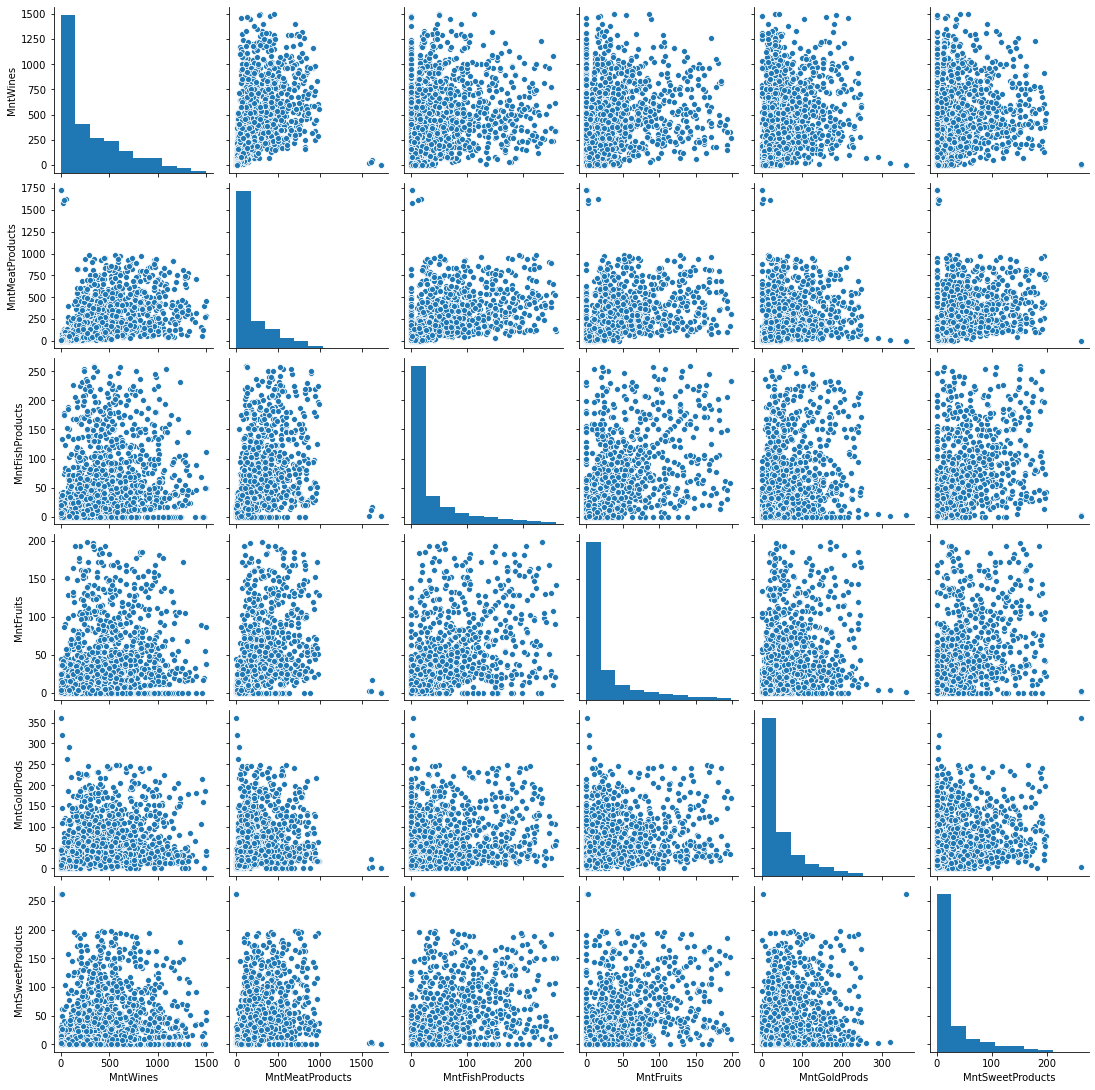

In [19]:
sns.pairplot(data_q1)
plt.show()

# Q2

- Linear Regression 
    - p value <0.05 기준 유의한 변수 : 
       Year_Birth, Income, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts,
       MntGoldProds, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response
       Educatio, mm
       
       
    - Coef가 양수면 양의 상관관계, 음수면 음의 상관관계를 나타냄 
        - 양의 상관관계 :  Education_Basic, Kidhome, Response, NumCatalogPurchases, NumStorePurchases,                  NumWebPurchases, mm, MntFruits, MntSweetProducts, MntGoldProds, MntFishProducts, MntMeatProducts,            Recency, Income
   
        - 음의 상관관계 : Year_Birth, NumWebVisitsMonth, Education_Master, Education_Graduation,                         Education_2n_Cycle

In [20]:
model = sm.OLS.from_formula("MntWines ~ Year_Birth", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     57.13
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           5.91e-14
Time:                        23:41:05   Log-Likelihood:                -16184.
No. Observations:                2240   AIC:                         3.237e+04
Df Residuals:                    2238   BIC:                         3.238e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9028.4384   1154.287      7.822      0.0

In [21]:
model = sm.OLS.from_formula("MntWines ~ Income", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          7.78e-199
Time:                        23:41:05   Log-Likelihood:                -15759.
No. Observations:                2240   AIC:                         3.152e+04
Df Residuals:                    2238   BIC:                         3.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -101.1950     13.449     -7.524      0.0

In [22]:
model = sm.OLS.from_formula("MntWines ~ Teenhome", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05257
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.819
Time:                        23:41:05   Log-Likelihood:                -16212.
No. Observations:                2240   AIC:                         3.243e+04
Df Residuals:                    2238   BIC:                         3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    302.4191      9.714     31.133      0.0

In [23]:
model = sm.OLS.from_formula("MntWines ~ Kidhome", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     731.4
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.29e-139
Time:                        23:41:05   Log-Likelihood:                -15896.
No. Observations:                2240   AIC:                         3.180e+04
Df Residuals:                    2238   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    441.7594      8.007     55.173      0.0

In [24]:
model = sm.OLS.from_formula("MntWines ~ Recency", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5777
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.447
Time:                        23:41:05   Log-Likelihood:                -16212.
No. Observations:                2240   AIC:                         3.243e+04
Df Residuals:                    2238   BIC:                         3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    294.7674     14.004     21.049      0.0

In [25]:
model = sm.OLS.from_formula("MntWines ~ MntFruits", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     400.6
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           4.12e-82
Time:                        23:41:05   Log-Likelihood:                -16028.
No. Observations:                2240   AIC:                         3.206e+04
Df Residuals:                    2238   BIC:                         3.207e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    217.2056      7.855     27.653      0.0

In [26]:
model = sm.OLS.from_formula("MntWines ~ MntMeatProducts", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     1037.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          3.03e-187
Time:                        23:41:05   Log-Likelihood:                -15786.
No. Observations:                2240   AIC:                         3.158e+04
Df Residuals:                    2238   BIC:                         3.159e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         163.8522      7.315     

In [27]:
model = sm.OLS.from_formula("MntWines ~ MntFishProducts", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     425.7
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.02e-86
Time:                        23:41:05   Log-Likelihood:                -16017.
No. Observations:                2240   AIC:                         3.204e+04
Df Residuals:                    2238   BIC:                         3.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         211.5074      7.911     

In [28]:
model = sm.OLS.from_formula("MntWines ~ MntSweetProducts", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     393.2
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           9.45e-81
Time:                        23:41:05   Log-Likelihood:                -16031.
No. Observations:                2240   AIC:                         3.207e+04
Df Residuals:                    2238   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          218.6293      7.845  

In [29]:
model = sm.OLS.from_formula("MntWines ~ MntGoldProds", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     395.5
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           3.64e-81
Time:                        23:41:05   Log-Likelihood:                -16030.
No. Observations:                2240   AIC:                         3.206e+04
Df Residuals:                    2238   BIC:                         3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      193.8657      8.581     22.592   

In [30]:
model = sm.OLS.from_formula("MntWines ~ NumDealsPurchases", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2679
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.605
Time:                        23:41:06   Log-Likelihood:                -16212.
No. Observations:                2240   AIC:                         3.243e+04
Df Residuals:                    2238   BIC:                         3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           299.5049     11.13

In [31]:
model = sm.OLS.from_formula("MntWines ~ NumWebPurchases", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     932.2
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.86e-171
Time:                        23:41:06   Log-Likelihood:                -15822.
No. Observations:                2240   AIC:                         3.165e+04
Df Residuals:                    2238   BIC:                         3.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          35.6168     10.628     

In [32]:
model = sm.OLS.from_formula("MntWines ~ NumCatalogPurchases", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1514.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.10e-253
Time:                        23:41:06   Log-Likelihood:                -15634.
No. Observations:                2240   AIC:                         3.127e+04
Df Residuals:                    2238   BIC:                         3.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             109.2151    

In [33]:
model = sm.OLS.from_formula("MntWines ~ NumStorePurchases", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     1570.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.29e-260
Time:                        23:41:06   Log-Likelihood:                -15617.
No. Observations:                2240   AIC:                         3.124e+04
Df Residuals:                    2238   BIC:                         3.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -81.0054     11.14

In [34]:
data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Wday', 'yyyy', 'mm', 'dd',
       'Education_2n_Cycle'],
      dtype='object')

In [35]:
model = sm.OLS.from_formula("MntWines ~ NumWebVisitsMonth", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     256.5
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           9.83e-55
Time:                        23:41:06   Log-Likelihood:                -16091.
No. Observations:                2240   AIC:                         3.219e+04
Df Residuals:                    2238   BIC:                         3.220e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           540.4007     16.23

In [36]:
model = sm.OLS.from_formula("MntWines ~ Complain", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.410
Date:                Sat, 18 Jun 2022   Prob (F-statistic):             0.0649
Time:                        23:41:06   Log-Likelihood:                -16211.
No. Observations:                2240   AIC:                         3.243e+04
Df Residuals:                    2238   BIC:                         3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    305.2127      7.142     42.737      0.0

In [37]:
model = sm.OLS.from_formula("MntWines ~ Response", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           1.49e-32
Time:                        23:41:06   Log-Likelihood:                -16142.
No. Observations:                2240   AIC:                         3.229e+04
Df Residuals:                    2238   BIC:                         3.230e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    269.1044      7.472     36.014      0.0

In [38]:
model = sm.OLS.from_formula("MntWines ~ Education_2n_Cycle +Education_Basic+Education_Graduation+Education_Master", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     29.42
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           7.10e-24
Time:                        23:41:06   Log-Likelihood:                -16155.
No. Observations:                2240   AIC:                         3.232e+04
Df Residuals:                    2235   BIC:                         3.235e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              404.4959 

In [39]:
model = sm.OLS.from_formula("MntWines ~ Marital_Status_Absurd+Marital_Status_Alone+Marital_Status_Divorced+Marital_Status_Married+Marital_Status_Single+Marital_Status_Together+Marital_Status_Widow", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7783
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.606
Time:                        23:41:06   Log-Likelihood:                -16209.
No. Observations:                2240   AIC:                         3.243e+04
Df Residuals:                    2232   BIC:                         3.248e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [40]:
model = sm.OLS.from_formula("MntWines ~ Wday", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8095
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.368
Time:                        23:41:06   Log-Likelihood:                -16212.
No. Observations:                2240   AIC:                         3.243e+04
Df Residuals:                    2238   BIC:                         3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    313.2634     12.572     24.917      0.0

In [41]:
model = sm.OLS.from_formula("MntWines ~ mm", data=data)
result = model.fit()
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.774
Date:                Sat, 18 Jun 2022   Prob (F-statistic):             0.0290
Time:                        23:41:06   Log-Likelihood:                -16210.
No. Observations:                2240   AIC:                         3.242e+04
Df Residuals:                    2238   BIC:                         3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    275.1289     14.977     18.370      0.0

In [42]:
model = sm.OLS.from_formula("MntWines ~ dd", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0003809
Date:                Sat, 18 Jun 2022   Prob (F-statistic):              0.984
Time:                        23:41:06   Log-Likelihood:                -16212.
No. Observations:                2240   AIC:                         3.243e+04
Df Residuals:                    2238   BIC:                         3.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    304.1827     14.520     20.950      0.0

# Q3

- 와인 구매액에 의미있는 영향을 주는 변수들 : "MntWines","Year_Birth","Income","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts",
  "MntGoldProds","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth","Response",    "Education_2n_Cycle","Education_Basic","Education_Graduation","Education_Master","mm"
  
  
  
- NumStorePurchases, Income, MntMeatProducts, MntGoldProds, NumWebPurchases, NumCatalogPurchases,           NumStorePurchases, NumWebVisitsMonth, Response, mm 이 증가할수록 와인 구매가 증가했음을 확인

- Kidhome, Year_Birth, MntFruits, MntFishProduct, MntSweetProducts, MntSweetProducts, Education 와는 음의 상관관계를 보임 ( 증가할수록 와인 구매가 감소함)

In [43]:
model = sm.OLS.from_formula("MntWines ~ +Year_Birth+Income+Kidhome+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds+NumWebPurchases+NumCatalogPurchases+NumStorePurchases+NumWebVisitsMonth+Response+Education_2n_Cycle+Education_Basic+Education_Graduation+Education_Master+mm", data=data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:41:06   Log-Likelihood:                -15069.
No. Observations:                2240   AIC:                         3.018e+04
Df Residuals:                    2221   BIC:                         3.028e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              551.4747 

# Q4 

-Chi-Squared - Category variables  
-T-test - Continuous variables 사용

  결과
1. 유의한 변수 :   Year_Birth, Education, Marital, Income, Kidhome, Teenhome, mm, dd, Recency, MntWines, MntMeatProducts, MntFishProducts, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

                   

### Chi-Squared

In [44]:
data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Wday', 'yyyy', 'mm', 'dd',
       'Education_2n_Cycle'],
      dtype='object')

In [45]:
cont_table = pd.crosstab(data['Response'],data['Complain'])
cont_table

Complain,0,1
Response,,
0,1888,18
1,331,3


In [46]:
chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('쿠폰과 Complain 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 Complain 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Chi^2 값 :  0.01 

쿠폰과 Complain 변수는 유의한 상관관계가 없다. p value: 0.94 



In [47]:
cont_table = pd.crosstab(data_org['Response'],data_org['Education'])
cont_table

Education,2n Cycle,Basic,Graduation,Master,PhD
Response,,,,,
0,181,52,975,313,385
1,22,2,152,57,101


In [48]:
chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('쿠폰과 Education 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 Education 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Chi^2 값 :  23.08 

쿠폰과 Education 변수는 유의한 상관관계가 있다. p value: 0.0 



In [49]:
cont_table = pd.crosstab(data_org['Response'],data_org['Marital_Status'])
cont_table

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Response,,,,,,,,
0,1,2,184,766,374,520,58,1
1,1,1,48,98,106,60,19,1


In [50]:
chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('쿠폰과 Marital_Status 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 Marital_Status 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Chi^2 값 :  54.24 

쿠폰과 Marital_Status 변수는 유의한 상관관계가 있다. p value: 0.0 



In [51]:
cont_table = pd.crosstab(data['Response'],data['Wday'])
cont_table

Wday,0,1,2,3,4,5,6
Response,,,,,,,
0,282,282,279,278,268,234,283
1,51,59,46,30,42,50,56


In [52]:
chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('쿠폰과 Wday 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 Wday 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Chi^2 값 :  10.99 

쿠폰과 Wday 변수는 유의한 상관관계가 없다. p value: 0.09 



In [53]:
cont_table = pd.crosstab(data['Response'],data['mm'])
cont_table

mm,1,2,3,4,5,6,7,8,9,10,11,12
Response,,,,,,,,,,,,
0,167,150,185,160,192,150,90,176,152,173,154,157
1,30,28,26,22,24,16,11,46,41,39,33,18


In [54]:
chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('쿠폰과 mm 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 mm 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Chi^2 값 :  27.84 

쿠폰과 mm 변수는 유의한 상관관계가 있다. p value: 0.0 



In [55]:
cont_table = pd.crosstab(data['Response'],data['dd'])
cont_table

dd,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Response,,,,,,,,,,,,,,,,,,,,,
0,59,68,63,59,72,53,69,63,49,59,...,71,78,50,68,59,49,60,68,48,46
1,15,10,12,12,3,12,14,8,10,20,...,18,11,10,5,2,7,14,14,11,4


In [56]:
chi2_val, p, dof, expected = stats.chi2_contingency(cont_table.values, correction=False)
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('쿠폰과 dd 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 dd 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Chi^2 값 :  43.89 

쿠폰과 dd 변수는 유의한 상관관계가 있다. p value: 0.05 



### T test 

In [57]:
ttest1 = stats.ttest_ind(data['Response'],data['Kidhome'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 Kidhome 변수는 유의한 상관관계가 있다.','p value:', p.round(2),"\n")
else :
    print('쿠폰과 Kidhome 변수는 유의한 상관관계가 없다.','p value:', p.round(2),"\n")

Ttest_indResult(statistic=-21.63275512426166, pvalue=8.599715958885466e-99) 

쿠폰과 Kidhome 변수는 유의한 상관관계가 있다. p value: 0.0 



In [58]:
ttest1 = stats.ttest_ind(data['Response'],data['Teenhome'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 Teenhome 변수는 유의한 상관관계가 있다.','p value:', p.round(2),"\n")
else :
    print('쿠폰과 Teenhome 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Ttest_indResult(statistic=-25.97547496316305, pvalue=1.1057137684518975e-138) 

쿠폰과 Teenhome 변수는 유의한 상관관계가 있다. p value: 0.0 



In [59]:
ttest1 = stats.ttest_ind(data['Response'],data['Year_Birth'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 Year_Birth 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 Year_Birth 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Ttest_indResult(statistic=-7771.374682210689, pvalue=0.0) 

쿠폰과 Year_Birth 변수는 유의한 상관관계가 있다. p value: 0.0 



In [60]:
ttest1 = stats.ttest_ind(data['Response'],data['Income'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 Income 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 Income 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Ttest_indResult(statistic=-98.76205105961758, pvalue=0.0) 

쿠폰과 Income 변수는 유의한 상관관계가 있다. p value: 0.0 



In [61]:
ttest1 = stats.ttest_ind(data['Response'],data['Recency'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 Recency 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 Recency 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Ttest_indResult(statistic=-80.00177059617535, pvalue=0.0) 

쿠폰과 Recency 변수는 유의한 상관관계가 있다. p value: 0.0 



In [62]:
ttest1 = stats.ttest_ind(data['Response'],data['MntWines'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 MntWines 변수는 유의한 상관관계가 있다.','p value:', p.round(2),"\n")
else :
    print('쿠폰과 MntWines 변수는 유의한 상관관계가 없다.','p value:', p.round(2),"\n")

Ttest_indResult(statistic=-42.71512109446896, pvalue=0.0) 

쿠폰과 MntWines 변수는 유의한 상관관계가 있다. p value: 0.0 



In [63]:
ttest1 = stats.ttest_ind(data['Response'],data['MntMeatProducts'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 MntMeatProducts 변수는 유의한 상관관계가 있다.','p value:', p.round(2),"\n")
else :
    print('쿠폰과 MntMeatProducts 변수는 유의한 상관관계가 없다.','p value:', p.round(2),"\n")

Ttest_indResult(statistic=-34.97523982654803, pvalue=3.694296368467492e-237) 

쿠폰과 MntMeatProducts 변수는 유의한 상관관계가 있다. p value: 0.0 



In [64]:
ttest1 = stats.ttest_ind(data['Response'],data['MntFishProducts'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 MntFishProducts 변수는 유의한 상관관계가 있다.','p value:', p.round(2),"\n")
else :
    print('쿠폰과 MntFishProducts 변수는 유의한 상관관계가 없다.','p value:', p.round(2),"\n")

Ttest_indResult(statistic=-32.38086529992151, pvalue=7.32213329794358e-207) 

쿠폰과 MntFishProducts 변수는 유의한 상관관계가 있다. p value: 0.0 



In [65]:
ttest1 = stats.ttest_ind(data['Response'],data['NumDealsPurchases'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 NumDealsPurchases 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 NumDealsPurchases 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Ttest_indResult(statistic=-52.4132725669063, pvalue=0.0) 

쿠폰과 NumDealsPurchases 변수는 유의한 상관관계가 있다. p value: 0.0 



In [66]:
ttest1 = stats.ttest_ind(data['Response'],data['NumWebPurchases'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 NumWebPurchases 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 NumWebPurchases 변수는 유의한 상관관계가 없다.','p value:', p.round(2),"\n")

Ttest_indResult(statistic=-66.49102175891146, pvalue=0.0) 

쿠폰과 NumWebPurchases 변수는 유의한 상관관계가 있다. p value: 0.0 



In [67]:
ttest1 = stats.ttest_ind(data['Response'],data['NumCatalogPurchases'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 NumCatalogPurchases 변수는 유의한 상관관계가 있다.','p value:', p.round(2),"\n")
else :
    print('쿠폰과 NumCatalogPurchases 변수는 유의한 상관관계가 없다.','p value:', p.round(2),"\n")

Ttest_indResult(statistic=-40.3888436822149, pvalue=2.0503614419027512e-304) 

쿠폰과 NumCatalogPurchases 변수는 유의한 상관관계가 있다. p value: 0.0 



In [68]:
ttest1 = stats.ttest_ind(data['Response'],data['NumStorePurchases'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 NumStorePurchases 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 NumStorePurchases 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Ttest_indResult(statistic=-81.63601918112205, pvalue=0.0) 

쿠폰과 NumStorePurchases 변수는 유의한 상관관계가 있다. p value: 0.0 



In [69]:
ttest1 = stats.ttest_ind(data['Response'],data['NumWebVisitsMonth'])
print(ttest1,"\n")
p = ttest1.pvalue
if(p<0.05) : 
    print('쿠폰과 NumWebVisitsMonth 변수는 유의한 상관관계가 있다.', 'p value:', p.round(2),"\n")
else :
    print('쿠폰과 NumWebVisitsMonth 변수는 유의한 상관관계가 없다.', 'p value:', p.round(2),"\n")

Ttest_indResult(statistic=-99.71483937365156, pvalue=0.0) 

쿠폰과 NumWebVisitsMonth 변수는 유의한 상관관계가 있다. p value: 0.0 



# Q5

1. Log Transform 사용 - 큰 수를 같은 비율의 작은 수로 바꾸어줌 
                     => 정규성을 높이고 분석에서 정확한 값을 얻음
2. 쿠폰 사용 여부에 어떤 영향을 주는지 확인 1 or 0 => Logistic Regression


3. 결과 :
     
     1. 쿠폰 사용 여부에 유의한 변수들 : Education_2n_Cycle, Education_Graduation, Education_Master,                                                  Teenhome,Recency,MntMeatProducts, MntFishProducts, NumWebPurchases,                                          NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
     
     2. 쿠폰 사용 여부와 양의 상관관계에 있는 변수들 : MntMeatProducts, NumWebPurchases, NumCatalogPurchases                                                        NumWebVisitsMonth
     
     3. 쿠폰 사용 여부와 음의 상관관계에 있는 변수들 : Education_2n_Cycle, Education_Graduation,                                                                    Education_Master, Teenhome, Recency, MntFishProducts,NumStorePurchases


In [70]:
data_q5_1 = data[['Response','Education_2n_Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master','Marital_Status_Absurd','Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow','mm', 'dd']]

In [71]:
data_q5_test1 = data[['Income','Kidhome', 'Teenhome', 'Year_Birth',
       'Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']]

In [72]:
data_q5_test1 = data_q5_test1 +1


In [73]:
data_q5_test1

,Income,Kidhome,Teenhome,Year_Birth,Recency,MntWines,MntMeatProducts,MntFishProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58139.0,1,1,1958,59,636,547,173,4,9,11,5,8
1,46345.0,2,2,1955,39,12,7,3,3,2,2,3,6
2,71614.0,1,1,1966,27,427,128,112,2,9,3,11,5
3,26647.0,2,1,1985,27,12,21,11,3,3,1,5,7
4,58294.0,2,1,1982,95,174,119,47,6,6,4,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61224.0,1,2,1968,47,710,183,43,3,10,4,5,6
2236,64015.0,3,2,1947,57,407,31,1,8,9,3,6,8
2237,56982.0,1,1,1982,92,909,218,33,2,3,4,14,7
2238,69246.0,1,2,1957,9,429,215,81,3,7,6,11,4


In [74]:
data_q5_test = np.log(data_q5_test1)

In [75]:
data_q5_test

,Income,Kidhome,Teenhome,Year_Birth,Recency,MntWines,MntMeatProducts,MntFishProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,10.970592,0.000000,0.000000,7.579679,4.077537,6.455199,6.304449,5.153292,1.386294,2.197225,2.397895,1.609438,2.079442
1,10.743869,0.693147,0.693147,7.578145,3.663562,2.484907,1.945910,1.098612,1.098612,0.693147,0.693147,1.098612,1.791759
2,11.179046,0.000000,0.000000,7.583756,3.295837,6.056784,4.852030,4.718499,0.693147,2.197225,1.098612,2.397895,1.609438
3,10.190432,0.693147,0.000000,7.593374,3.295837,2.484907,3.044522,2.397895,1.098612,1.098612,0.000000,1.609438,1.945910
4,10.973254,0.693147,0.000000,7.591862,4.553877,5.159055,4.779123,3.850148,1.791759,1.791759,1.386294,1.945910,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,11.022295,0.000000,0.693147,7.584773,3.850148,6.565265,5.209486,3.761200,1.098612,2.302585,1.386294,1.609438,1.791759
2236,11.066873,1.098612,0.693147,7.574045,4.043051,6.008813,3.433987,0.000000,2.079442,2.197225,1.098612,1.791759,2.079442
2237,10.950491,0.000000,0.000000,7.591862,4.521789,6.812345,5.384495,3.496508,0.693147,1.098612,1.386294,2.639057,1.945910
2238,11.145421,0.000000,0.693147,7.579168,2.197225,6.061457,5.370638,4.394449,1.098612,1.945910,1.791759,2.397895,1.386294


In [76]:
data_q5 = pd.concat([data_q5_1,data_q5_test], axis =1 )

In [77]:
formula = 'Response ~ Education_2n_Cycle + Education_Basic + Education_Graduation + Education_Master + Marital_Status_Absurd + Marital_Status_Alone + Marital_Status_Divorced + Marital_Status_Married + Marital_Status_Single + Marital_Status_Together + Marital_Status_Widow + Income + Kidhome + Teenhome + mm + dd + Year_Birth + Recency + MntWines + MntMeatProducts + MntFishProducts + NumDealsPurchases + NumWebPurchases + NumWebPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth'

In [78]:
model = smf.glm(formula = formula, data=data_q5, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                 2240
Model:                            GLM   Df Residuals:                     2213
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -696.13
Date:                Sat, 18 Jun 2022   Deviance:                       1392.3
Time:                        23:41:07   Pearson chi2:                 1.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 